# SMOTE - Imbalance Data

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
data = pd.read_csv('adult_dataset.csv',header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


 <=50K    24720
 >50K      7841
Name: 14, dtype: int64

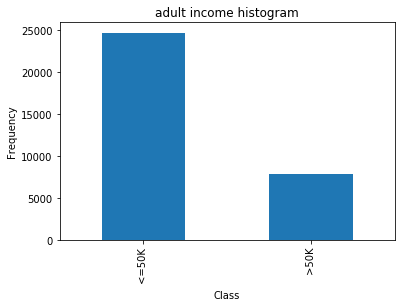

In [3]:
pd.value_counts(data.iloc[:,-1]).plot.bar()
plt.title('adult income histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data.iloc[:,-1].value_counts()

In [4]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
le = preprocessing.LabelEncoder()
#fitandtransform
# use df.apply() to apply le.fit_transform to all columns
data = data.apply(le.fit_transform)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# split data into its X and y components
X, y = data.values[:,:-1], data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (22792, 14)
Number transactions y_train dataset:  (22792,)
Number transactions X_test dataset:  (9769, 14)
Number transactions y_test dataset:  (9769,)


In [7]:
print("Before OverSampling, counts of label '>50K': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '<=50K': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '>50K': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '<=50K': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '>50K': 5479
Before OverSampling, counts of label '<=50K': 17313 

After OverSampling, the shape of train_X: (34626, 14)
After OverSampling, the shape of train_y: (34626,) 

After OverSampling, counts of label '>50K': 17313
After OverSampling, counts of label '<=50K': 17313


In [8]:
# processed and balanced dataset to a new csv file in the data directory
data.to_csv('oversampled_dataset_adult.csv', sep=',')